In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
import openpyxl


pd.options.mode.copy_on_write = True

In [54]:
df = pd.read_csv('fraudTrain.csv')

In [55]:
df.drop(columns=['ID','trans_num'],inplace=True)

# Removing *Names* features

In [56]:
df.drop(columns=['firstName','lastName'],inplace=True)

# Pre-Processing Features

### *Time* Feature

In [57]:
df['Time'] = pd.to_datetime(df['Time'])

In [58]:
df['Time:year'] = df['Time'].dt.year
df['Time:month'] = df['Time'].dt.month
df['Time:day'] = df['Time'].dt.day
df['Time:day_of_week'] = df['Time'].dt.day_of_week
df['Time:hour'] = df['Time'].dt.hour
df['Time:minute'] = df['Time'].dt.minute

In [59]:
df.drop(columns=['Time'], inplace=True)

### *Amount* Feature

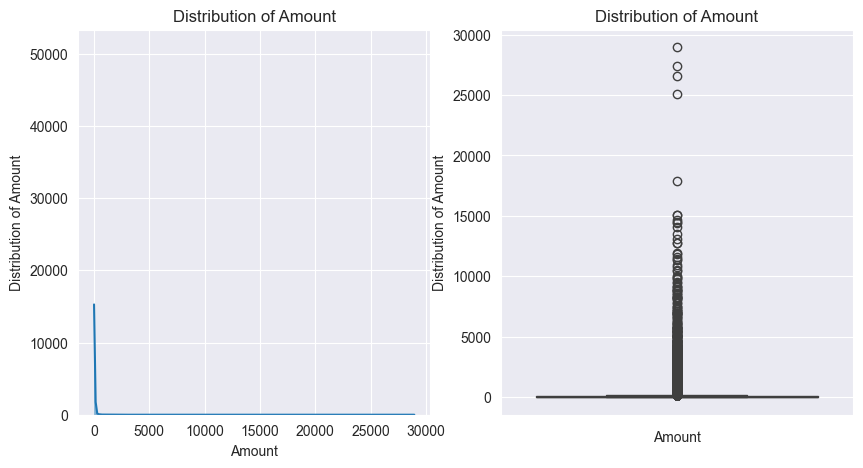

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['Amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['Amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [65]:
z_scores = (df['Amount'] - np.mean(df['Amount'])) / np.std(df['Amount'])
trial_df = df[np.abs(z_scores) <= 3]

KeyError: 'Amount'

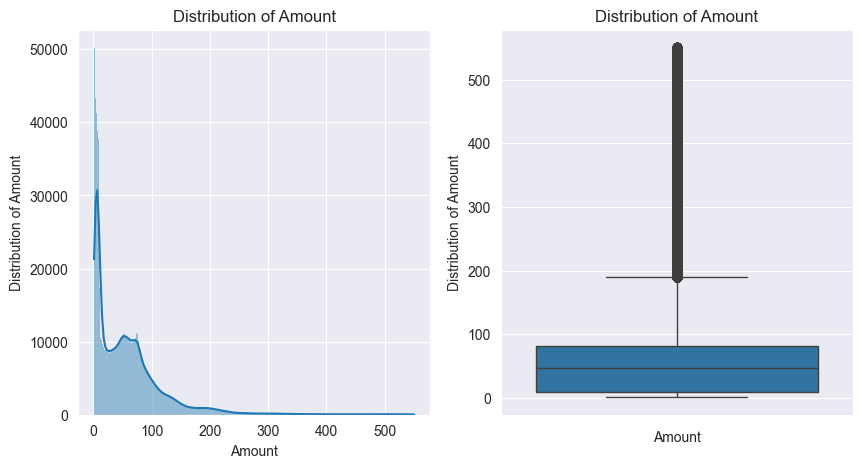

In [10]:
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['Amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['Amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [60]:
df['log_amount'] = np.log(df['Amount'])

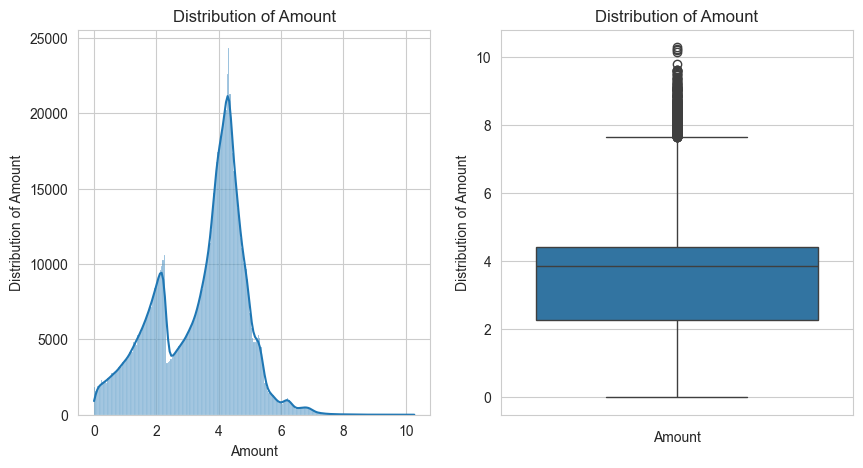

In [61]:
fig2, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['log_amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['log_amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [62]:
df.drop(columns='Amount',inplace=True)

In [64]:
print(df['merchant'].nunique())
print(df['category'].nunique()) 

693
15


### Checking Collinearity

<Axes: >

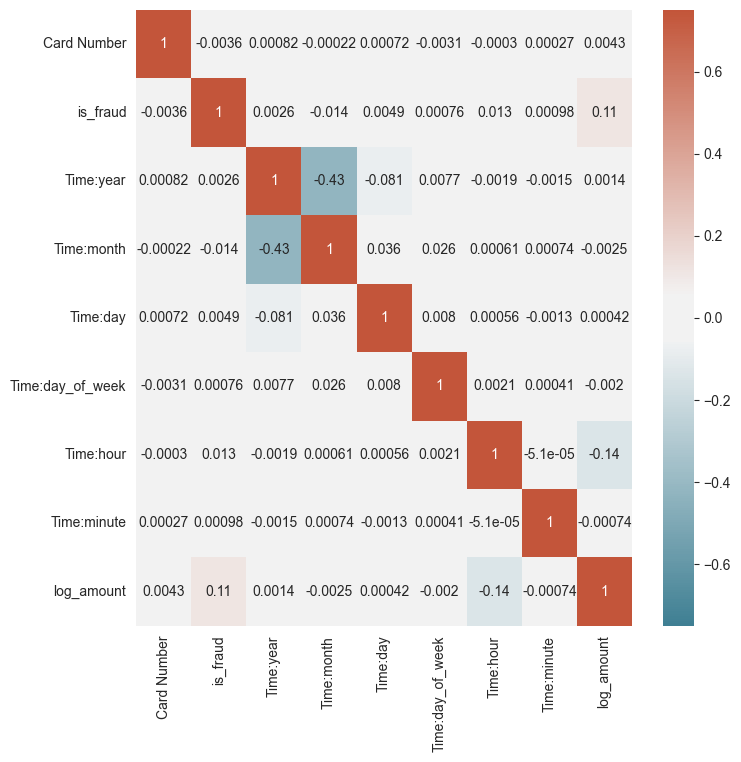

In [66]:
plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(220,20,sep=20,as_cmap=True)
sns.heatmap(df[list(df.describe())].corr(),vmin=-0.75,vmax=0.75,center=0,cmap=cmap,annot=True)

### Noticed Correlated Features
- *Time in Hour* and *Amount* of transaction
- *Time in Year* and *Time in Month*

In [69]:
df.dtypes

Card Number         float64
merchant             object
category             object
is_fraud            float64
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
Time:hour             int32
Time:minute           int32
log_amount          float64
dtype: object

### Applying *OverSampling & UnderSampling*

In [78]:
merchant_fraud_counts = df.groupby(['merchant','is_fraud']).size().unstack(fill_value=0)
merchant_fraud_counts

is_fraud,0.0,1.0
merchant,,
fraud_Abbott-Rogahn,1415,3
fraud_Abbott-Steuber,1349,4
fraud_Abernathy and Sons,1348,4
fraud_Abshire PLC,1431,8
"fraud_Adams, Kovacek and Kuhlman",710,3
...,...,...
fraud_Zemlak Group,965,12
"fraud_Zemlak, Tillman and Cremin",1397,1
fraud_Ziemann-Waters,1285,2


In [79]:
merchant_counts =df['merchant'].value_counts()
merchant_counts

merchant
fraud_Kilback LLC                       3361
fraud_Cormier LLC                       2854
fraud_Schumm PLC                        2792
fraud_Boyer PLC                         2705
fraud_Kuhn LLC                          2676
                                        ... 
fraud_Kilback, Nitzsche and Leffler      602
fraud_Satterfield-Lowe                   591
fraud_Medhurst, Labadie and Gottlieb     580
fraud_Hahn, Douglas and Schowalter       577
fraud_Reichert-Weissnat                  575
Name: count, Length: 693, dtype: int64

In [82]:
category_fraud_counts = df.groupby(['category','is_fraud']).size().unstack(fill_value=0)
category_fraud_counts 

is_fraud,0.0,1.0
category,,
entertainment,72528,179
food_dining,70746,116
gas_transport,101255,473
grocery_net,34959,102
grocery_pos,94009,1332
health_fitness,66164,103
home,95031,144
kids_pets,87139,182
misc_net,48064,692


In [67]:
df['is_fraud'].value_counts()

is_fraud
0.0    996390
1.0      5713
Name: count, dtype: int64

In [44]:
under_sampler = RandomUnderSampler(sampling_strategy=0.005974,random_state=42)
X = df.drop('is_fraud',axis=1)
y = df['is_fraud']

x_resampled, y_resampled = under_sampler.fit_resample(X,y)
y_resampled.value_counts()

is_fraud
0.0    500000
1.0      2987
Name: count, dtype: int64

In [46]:
categorical_indices = [df.columns.get_loc('merchant'),df.columns.get_loc('category')]
encoder = OneHotEncoder()

smote_nc = SMOTENC(categorical_features=categorical_indices, sampling_strategy=1,random_state=42,k_neighbors=5,categorical_encoder=encoder)

In [49]:
trial = pd.get_dummies(data=df,columns=['category','merchant'],drop_first=True)

(992295, 714)

In [52]:
X_trial = trial.drop(columns=['is_fraud'],axis=1)
Y_trial = trial['is_fraud']

X_trial_resampled, Y_trial_resampled = smote_nc.fit_resample(X_trial,Y_trial)

MemoryError: Unable to allocate 5.26 GiB for an array with shape (711, 992295) and data type float64

### *Merchant* feature (using Feature Hashing)

### *Merchant & Category* feature (using One Hot Encoding)

In [17]:
df = pd.get_dummies(data=df,columns=['merchant','category'],drop_first=True)

In [18]:
df.shape

(992295, 714)